In [129]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [61]:
data1=pd.read_csv("/content/delivery_time (1).csv") #loading delivery time information

In [62]:
data1.shape #two columns present  

(21, 2)

In [63]:
data1.isnull() #no null values

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [64]:
data1.dtypes #datatypes are correct

Delivery Time    float64
Sorting Time       int64
dtype: object

In [65]:
data1[data1.duplicated()].shape #first row, second column is duplicate, 21 is there two times in sorting time

(0, 2)

In [66]:
data1[data1.duplicated()] #no duplicated rows

,Delivery Time,Sorting Time


# EDA

{'boxes': [<matplotlib.lines.Line2D at 0x7fe367c3fbd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe367c46c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe367c4dcd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe367c4d790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe367c46210>,
  <matplotlib.lines.Line2D at 0x7fe367c46750>]}

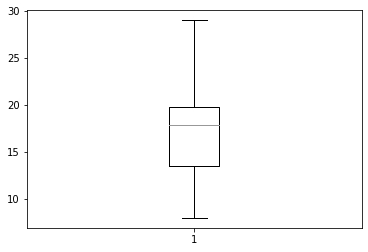

In [67]:
plt.boxplot(data1['Delivery Time']) #no outliers present in Delivery time

{'boxes': [<matplotlib.lines.Line2D at 0x7fe367ba3ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe367ba9f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe367bb1f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe367bb1a50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe367ba94d0>,
  <matplotlib.lines.Line2D at 0x7fe367ba9a10>]}

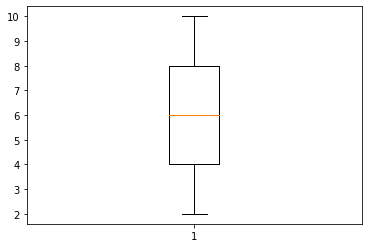

In [68]:
plt.boxplot(data1['Sorting Time']) #no outliers for sorting time

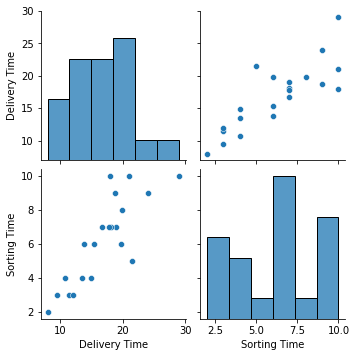

In [69]:
import seaborn as sns
sns.pairplot(data1)

In [70]:
data1.corr() #positive correlation of 0.825

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [71]:
data1.dropna()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [72]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [73]:
array=data1.values
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX1=scaler.fit_transform(array)
#transformed data
set_printoptions(precision=2)
print(rescaledX1[:,:])

[[0.62 1.  ]
 [0.26 0.25]
 [0.56 0.5 ]
 [0.76 0.88]
 [1.   1.  ]
 [0.35 0.5 ]
 [0.52 0.62]
 [0.07 0.12]
 [0.47 1.  ]
 [0.51 0.88]
 [0.56 0.75]
 [0.13 0.25]
 [0.41 0.62]
 [0.17 0.12]
 [0.19 0.12]
 [0.33 0.25]
 [0.27 0.5 ]
 [0.48 0.62]
 [0.   0.  ]
 [0.47 0.62]
 [0.64 0.38]]


In [74]:
from sklearn.preprocessing import StandardScaler
array=data1.values
scaler=StandardScaler().fit(array)
resclaedX1=scaler.transform(array)
set_printoptions(precision=2)
print(rescaledX1[:,:])

[[0.62 1.  ]
 [0.26 0.25]
 [0.56 0.5 ]
 [0.76 0.88]
 [1.   1.  ]
 [0.35 0.5 ]
 [0.52 0.62]
 [0.07 0.12]
 [0.47 1.  ]
 [0.51 0.88]
 [0.56 0.75]
 [0.13 0.25]
 [0.41 0.62]
 [0.17 0.12]
 [0.19 0.12]
 [0.33 0.25]
 [0.27 0.5 ]
 [0.48 0.62]
 [0.   0.  ]
 [0.47 0.62]
 [0.64 0.38]]


In [75]:
rescaledXn=pd.DataFrame(rescaledX1,columns=['Delivery Time', 'Sorting Time'])

In [76]:
print(rescaledXn)

    Delivery Time  Sorting Time
0        0.619048         1.000
1        0.261905         0.250
2        0.559524         0.500
3        0.761905         0.875
4        1.000000         1.000
5        0.350000         0.500
6        0.523810         0.625
7        0.071429         0.125
8        0.471429         1.000
9        0.511905         0.875
10       0.563333         0.750
11       0.130952         0.250
12       0.413333         0.625
13       0.166667         0.125
14       0.191905         0.125
15       0.327619         0.250
16       0.273810         0.500
17       0.481429         0.625
18       0.000000         0.000
19       0.468095         0.625
20       0.642857         0.375


# Simple Regression plot on the given data without any transformation

In [77]:
import statsmodels.formula.api as smf
model11=smf.ols("data1['Delivery Time']~data1['Sorting Time']", data=data1).fit()

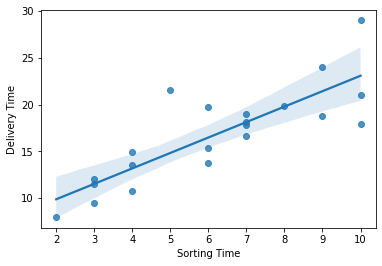

In [78]:
sns.regplot(x='Sorting Time', y='Delivery Time', data=data1)

In [79]:
model11.params

Intercept                6.582734
data1['Sorting Time']    1.649020
dtype: float64

In [80]:
model11.rsquared

0.6822714748417231

In [81]:
model12=smf.ols("rescaledXn['Delivery Time']~rescaledXn['Sorting Time']", data=rescaledXn).fit()

In [82]:
model12.params

Intercept                     0.089561
rescaledXn['Sorting Time']    0.628198
dtype: float64

In [83]:
model12.rsquared #the rsquared values for the normalised dataset and the given data set is the same 

0.6822714748417231

# Log transformation

In [107]:
data1_log=py.log(data1)

In [108]:
model1_log=smf.ols("data1_log['Delivery Time']~data1_log['Sorting Time']", data=data1_log).fit()

In [109]:
model1_log.params

Intercept                    1.741987
data1_log['Sorting Time']    0.597522
dtype: float64

In [110]:
model1_log.pvalues

Intercept                    5.921137e-11
data1_log['Sorting Time']    1.601539e-07
dtype: float64

In [111]:
model1_log.rsquared

0.77216134926874

In [112]:
model1_log.rsquared_adj

0.7601698413355158

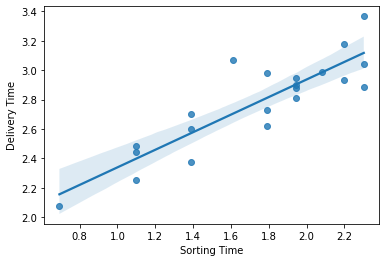

In [113]:
sns.regplot(x='Sorting Time',y='Delivery Time',data=data1_log)

# Square root transformation

In [117]:
data1_root=py.sqrt(data1)

In [121]:
model1_root=smf.ols("data1_root['Delivery Time']~data1_root['Sorting Time']",data=data1_root).fit()

In [122]:
model1_root.pvalues

Intercept                     1.833621e-04
data1_root['Sorting Time']    8.475706e-07
dtype: float64

In [123]:
model1_root.rsquared

0.7292011987544664

In [142]:
model1_root.params

Intercept                     1.613479
data1_root['Sorting Time']    1.002217
dtype: float64

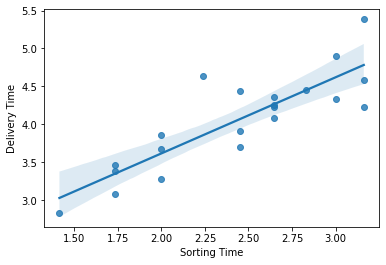

In [143]:
sns.regplot(x='Sorting Time',y='Delivery Time',data=data1_root)

# Reciprocal Transformation

In [124]:
data1_reci=1/(data1)

In [125]:
model1_reci=smf.ols("data1_reci['Delivery Time']~data1_reci['Sorting Time']",data=data1_reci).fit()

In [126]:
model1_reci.pvalues

Intercept                     9.489472e-06
data1_reci['Sorting Time']    7.022937e-09
dtype: float64

In [128]:
model1_reci.rsquared

0.8354583624350859

In [141]:
model1_reci.params

Intercept                     0.026629
data1_reci['Sorting Time']    0.196163
dtype: float64

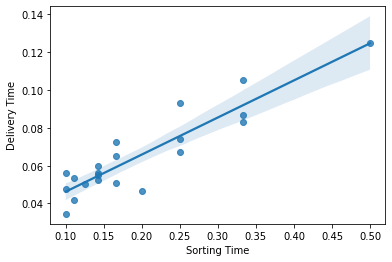

In [144]:
sns.regplot(x='Sorting Time',y='Delivery Time',data=data1_reci)

# cuberoot

In [136]:
data1_cuberoot=data1**(1/3)

In [137]:
model1_cuberoot=smf.ols("data1_cuberoot['Delivery Time']~data1_cuberoot['Sorting Time']",data=data1_cuberoot).fit()

In [138]:
model1_cuberoot.params

Intercept                         1.013571
data1_cuberoot['Sorting Time']    0.845585
dtype: float64

In [139]:
model1_cuberoot.pvalues

Intercept                         9.941770e-05
data1_cuberoot['Sorting Time']    4.904127e-07
dtype: float64

In [140]:
model1_cuberoot.rsquared

0.7441167577566266

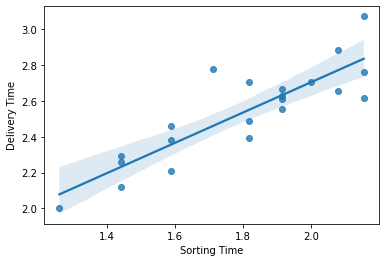

In [145]:
sns.regplot(x='Sorting Time',y='Delivery Time',data=data1_cuberoot)